<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inspection" data-toc-modified-id="Inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inspection</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#CSVs-and-Preprocessing" data-toc-modified-id="CSVs-and-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CSVs and Preprocessing</a></span></li><li><span><a href="#Primary-Inspection" data-toc-modified-id="Primary-Inspection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Primary Inspection</a></span><ul class="toc-item"><li><span><a href="#Open-&amp;-Sales" data-toc-modified-id="Open-&amp;-Sales-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Open &amp; Sales</a></span></li><li><span><a href="#Holidays" data-toc-modified-id="Holidays-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Holidays</a></span></li><li><span><a href="#Pre_R" data-toc-modified-id="Pre_R-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Pre_R</a></span></li></ul></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prophet</a></span><ul class="toc-item"><li><span><a href="#Inspecting-Primary-model" data-toc-modified-id="Inspecting-Primary-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inspecting Primary model</a></span><ul class="toc-item"><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Adding-Holidays-to-Primary-Model" data-toc-modified-id="Adding-Holidays-to-Primary-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Adding Holidays to Primary Model</a></span><ul class="toc-item"><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Adding-fb-built-in-Holidays-to-the-Second-Model" data-toc-modified-id="Adding-fb-built-in-Holidays-to-the-Second-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adding fb built-in Holidays to the Second Model</a></span><ul class="toc-item"><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li></ul></li><li><span><a href="#Pre-Renovartion" data-toc-modified-id="Pre-Renovartion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pre Renovartion</a></span><ul class="toc-item"><li><span><a href="#Assigning-holidays_prior_scale" data-toc-modified-id="Assigning-holidays_prior_scale-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Assigning holidays_prior_scale</a></span></li><li><span><a href="#Without-fb-Holidays" data-toc-modified-id="Without-fb-Holidays-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Without fb Holidays</a></span></li></ul></li><li><span><a href="#Final-Outcome" data-toc-modified-id="Final-Outcome-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Outcome</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Replacing-Test-pred-with-real-values" data-toc-modified-id="Replacing-Test-pred-with-real-values-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Replacing Test pred with real values</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Final Model</a></span></li></ul></li></ul></div>

# Inspection

## Libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from datetime import datetime
rcParams["figure.figsize"] = 10, 6

import warnings
warnings.filterwarnings("ignore")

## Models

from statsmodels.tsa.arima_model import ARIMA
import fbprophet
from fbprophet import Prophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


## CSVs and Preprocessing

In [292]:
#stores = pd.read_csv("../data/store.csv", low_memory=False)
#stores.head()

In [293]:
train = pd.read_csv("../data/train.csv", low_memory=False)
train['Date'] = pd.to_datetime(train['Date'])
#train.set_index('Date', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [294]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [295]:
#creating timeseries of date

train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
sales = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'])

sales.columns=['ds','y'] 
sales.head()

,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [296]:
sales_m = sales.copy()

sales_m['ds'] = sales_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
sales_m['ds'] = pd.to_datetime(sales_m['ds'])

sales_m = sales_m.groupby('ds').sum()
sales_m.reset_index(inplace = True)

sales_m.columns=['ds','y'] 
sales_m.head()


,ds,y
0,2013-01-01,180132207
1,2013-02-01,171534275
2,2013-03-01,201180369
3,2013-04-01,183431432
4,2013-05-01,185411063


In [297]:
indexed_sales_m = sales_m.set_index('ds')
Pre_R_m = indexed_sales_m.loc['2012-12-30':'2014-06-30']
Pre_R_m.reset_index(inplace = True)
Pre_R_m.tail()


,ds,y
13,2014-02-01,178924677
14,2014-03-01,193019854
15,2014-04-01,194544977
16,2014-05-01,194693257
17,2014-06-01,190047051


In [298]:
indexed_sales = sales.set_index('ds')
Pre_R = indexed_sales.loc['2013-01-01':'2014-06-30']
Pre_R.reset_index(inplace = True)
Pre_R.tail()


,ds,y
541,2014-06-26,5802491
542,2014-06-27,6910940
543,2014-06-28,6586535
544,2014-06-29,257513
545,2014-06-30,13308602


## Primary Inspection

In [299]:
train.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

### Open & Sales

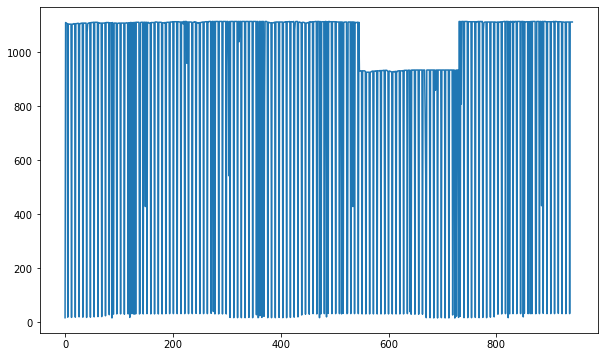

In [300]:
plt.plot(train['Open'])

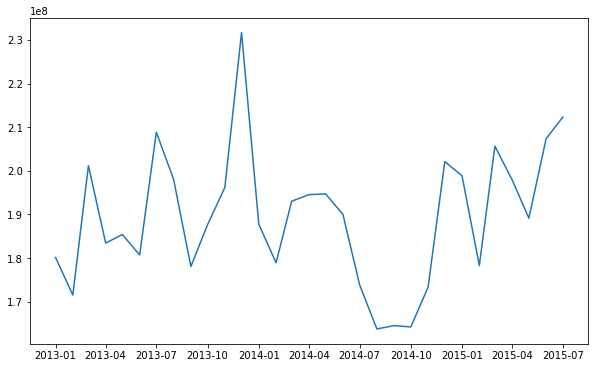

In [301]:
plt.plot(Series_day_to_mon(indexed_sales))

### Holidays

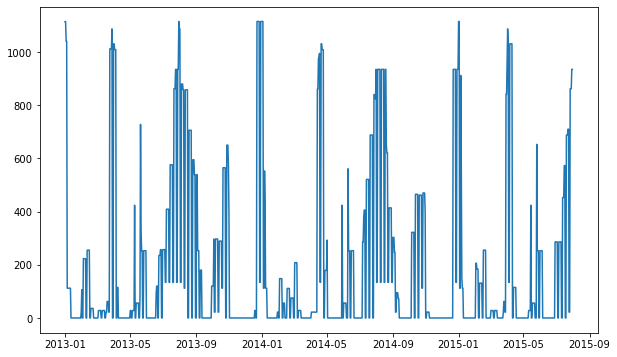

In [302]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
season = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'Sales'])

season.columns=['ds','y'] 
season_indexed = season.copy()
season_indexed['ds'] = pd.to_datetime(season_indexed['ds'])
season_indexed.set_index('ds', inplace=True)
season_indexed.head()

plt.plot(season_indexed)

In [303]:
holidays = season[season['y'] > 0]
holidays.reset_index(inplace=True, drop = True)
holidays.columns= ['ds','holiday']
list_holidays = holidays["holiday"].to_list()
binned_holidays = []
for i in list_holidays:
    if i < 251:
        binned_holidays.append('250')
    if i > 250 and i < 501:
        binned_holidays.append('500')
    if i > 500 and i < 751:
        binned_holidays.append('750')
    if i > 750:
        binned_holidays.append('1000')
binned_holidays

holidays["holiday"] = binned_holidays

schools = holidays.copy()

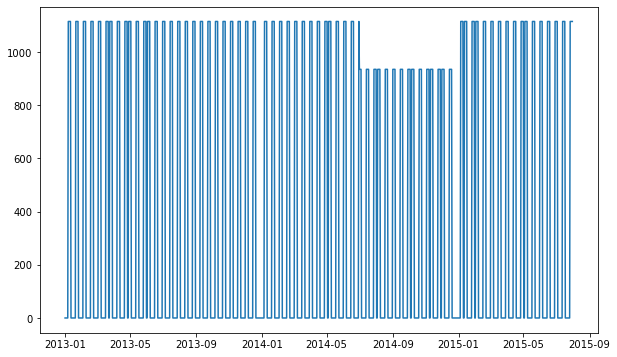

In [304]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
promo = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday',
       'Sales'])

promo.columns=['ds','y'] 
promo_indexed = promo.copy()
promo_indexed['ds'] = pd.to_datetime(promo_indexed['ds'])
promo_indexed.set_index('ds', inplace=True)
promo_indexed.head()

plt.plot(promo_indexed)

In [305]:
promo = promo[promo['y'] > 0]
promo.reset_index(inplace=True, drop = True)
promo.columns= ['ds','holiday']
list_promo = promo["holiday"].to_list()
binned_promo = []
for i in list_promo:
    if i > 0:
        binned_promo.append('promo')


promo["holiday"] = binned_promo
promo.head()

,ds,holiday
0,2013-01-07,promo
1,2013-01-08,promo
2,2013-01-09,promo
3,2013-01-10,promo
4,2013-01-11,promo


In [306]:
holidays = pd.concat((holidays, promo))
holidays

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
355,2015-07-27,promo
356,2015-07-28,promo
357,2015-07-29,promo
358,2015-07-30,promo


In [307]:
holidays_15 = pd.concat((promo[135:275], schools[194:376]))
holidays_15['year'] = holidays_15['ds'].dt.year +1 
holidays_15['month'] = holidays_15['ds'].dt.month
holidays_15['day'] = holidays_15['ds'].dt.day
holidays_15['ds'] = pd.to_datetime(holidays_15[['year','month','day']])
holidays_15.drop(columns=['year','month','day'],inplace = True)
holidays_pred = pd.concat((holidays, holidays_15))
holidays_pred.tail()

,ds,holiday
371,2015-12-27,250
372,2015-12-28,250
373,2015-12-29,1000
374,2015-12-30,1000
375,2015-12-31,1000


### Pre_R

In [308]:
season_Pre_R = season.set_index('ds')
holidays_Pre_R = season_Pre_R.loc['2012-12-30':'2014-06-30']
holidays_Pre_R.reset_index(inplace = True)
holidays_Pre_R.head()

,ds,y
0,2013-01-01,1114
1,2013-01-02,1115
2,2013-01-03,1040
3,2013-01-04,1040
4,2013-01-05,112


In [309]:


holidays_Pre_R = holidays_Pre_R[holidays_Pre_R['y'] > 0]
holidays_Pre_R.reset_index(inplace=True, drop = True)
holidays_Pre_R.columns= ['ds','holiday']
list_holidays_Pre_R = holidays_Pre_R["holiday"].to_list()
binned_holidays_Pre_R = []
for i in list_holidays_Pre_R:
    if i < 251:
        binned_holidays_Pre_R.append('250')
    if i > 250 and i < 501:
        binned_holidays_Pre_R.append('500')
    if i > 500 and i < 751:
        binned_holidays_Pre_R.append('750')
    if i > 750:
        binned_holidays_Pre_R.append('1000')
#    if i > 0:
#        binned_holidays_Pre_R.append('school')


binned_holidays_Pre_R

holidays_Pre_R["holiday"] = binned_holidays_Pre_R
holidays_Pre_R

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
272,2014-06-16,500
273,2014-06-17,500
274,2014-06-18,500
275,2014-06-19,500


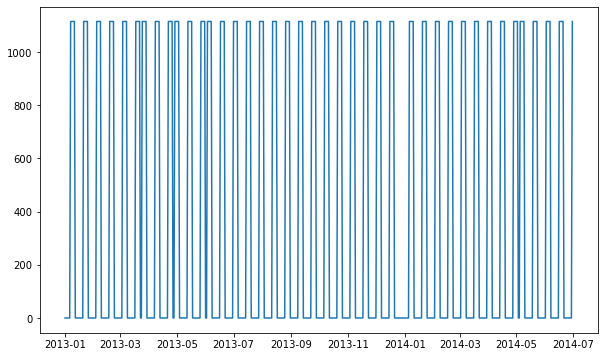

In [310]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
promo_Pre_R = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday',
       'Sales'])
promo_Pre_R = promo_Pre_R.set_index('Date')
promo_Pre_R = promo_Pre_R.loc['2012-12-30':'2014-06-30']
promo_Pre_R.reset_index(inplace = True)

promo_Pre_R.columns=['ds','y'] 
promo_Pre_R_indexed = promo_Pre_R.copy()
promo_Pre_R_indexed['ds'] = pd.to_datetime(promo_Pre_R_indexed['ds'])
promo_Pre_R_indexed.set_index('ds', inplace=True)
promo_Pre_R_indexed.head()

plt.plot(promo_Pre_R_indexed)


In [311]:
promo_Pre_R = promo_Pre_R[promo_Pre_R['y'] > 0]
promo_Pre_R.reset_index(inplace=True, drop = True)
promo_Pre_R.columns= ['ds','holiday']
list_promo_Pre_R = promo_Pre_R["holiday"].to_list()
binned_promo_Pre_R = []
for i in list_promo_Pre_R:
    if i > 0:
        binned_promo_Pre_R.append('promo')


promo_Pre_R["holiday"] = binned_promo_Pre_R

In [312]:
holidays_Pre_R = pd.concat((holidays_Pre_R, promo_Pre_R))
holidays_Pre_R

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
196,2014-06-17,promo
197,2014-06-18,promo
198,2014-06-19,promo
199,2014-06-20,promo


# Functions

In [313]:
def Zero_maker(timeseries):
    list_modified = []
    
    if timeseries.columns == ['yhat']:
        timeseries_2 = timeseries.copy()
        lista = timeseries_2['yhat'].to_list()
        for i in lista:
            if i < 0:
                list_modified.append(0)
            else:
                list_modified.append(i)

        timeseries_2['yhat'] = list_modified
        
        
    elif timeseries.columns == ['y']:
        timeseries_2 = timeseries.copy()
        lista = timeseries_2['y'].to_list()
        for i in lista:
            if i < 0:
                list_modified.append(0)
            else:
                list_modified.append(i)

        timeseries_2['y'] = list_modified        
    
    
    else:
        print('Not y or yhat! Check column names.')
        
    return(timeseries_2)


In [314]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_test(data, pred):

    # Model validation 
    ME_train = np.mean(data['y']-pred['yhat'])

    MAE_train = mean_absolute_error(data['y'],pred['yhat'])
    
    MSE_train = mean_squared_error(data['y'],pred['yhat'])

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(data['y']-pred['yhat']) / data['y'])* 100.)

    R2_train = r2_score(data['y'],pred['yhat'])

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    #df_train = pd.DataFrame({'Real_value': data, 'Predicted_value': pred})

    return performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def zero_performance_test(data, pred):

    # Model validation 
    ME_train = np.mean(data['y']-Zero_maker(pred)['yhat'])

    MAE_train = mean_absolute_error(data['y'],Zero_maker(pred)['yhat'])
    
    MSE_train = mean_squared_error(data['y'],Zero_maker(pred)['yhat'])

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(data['y']-Zero_maker(pred)['yhat']) / data['y'])* 100.)

    R2_train = r2_score(data['y'],Zero_maker(pred)['yhat'])

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    #df_train = pd.DataFrame({'Real_value': data, 'Predicted_value': pred})

    return performance

In [315]:
def Series_day_to_mon(Series):

    Series_m = Series.reset_index()
    Series_m['ds'] = pd.to_datetime(Series_m['ds'])

    Series_m['ds'] = Series_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
    Series_m['ds'] = pd.to_datetime(Series_m['ds'])
    Series_m = Series_m.groupby('ds').sum()
    Series_m.reset_index(inplace = True)
    Series_m['ds'] = pd.to_datetime(Series_m['ds'])

    Series_m.set_index('ds', inplace=True)
    Series_m
    return Series_m

# Prophet

## Inspecting Primary model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


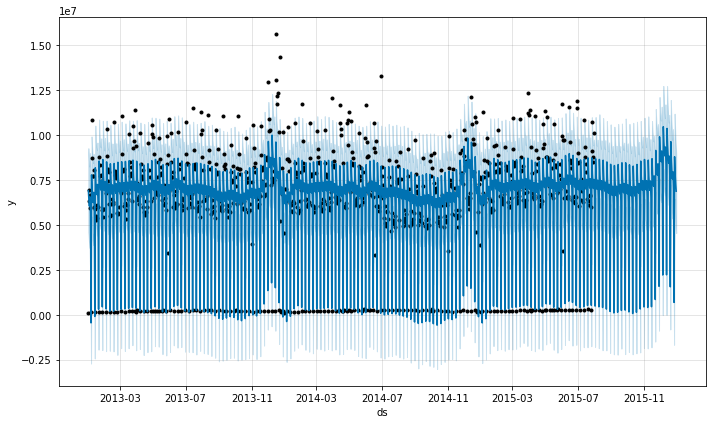

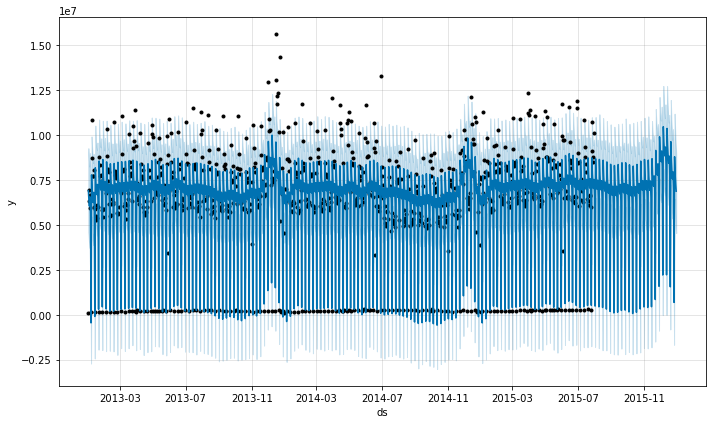

In [316]:
# Initializing Model
model_x = Prophet(yearly_seasonality=True)
#model_x.add_country_holidays(country_name='Germany')
model_x.fit(sales)
future_dates_x = model_x.make_future_dataframe(periods = 153)
prediction_x = model_x.predict(future_dates_x)

model_x.plot(prediction_x)

### Residuals

In [317]:
sales_train_pred = prediction_x['yhat'][0:942]
residual = sales['y'] - sales_train_pred

residual_indexed = sales.copy()
residual_indexed['y'] = residual.to_list()
residual_indexed

residual_indexed_S = residual_indexed.set_index('ds')


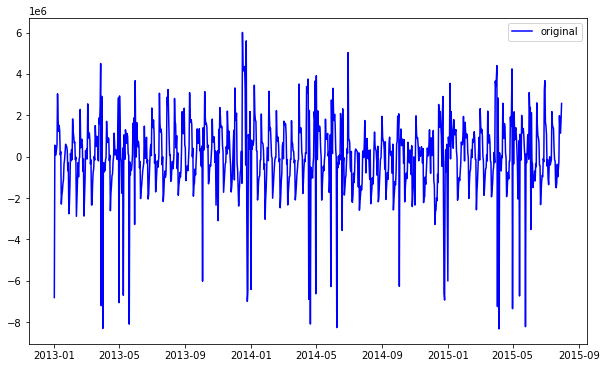

In [318]:
resid = plt.plot(residual_indexed_S, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

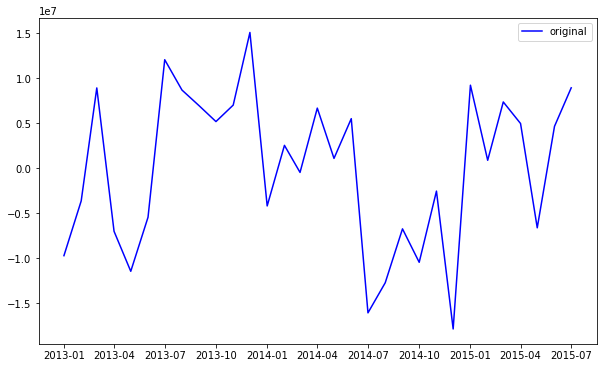

In [319]:
residual_m = residual_indexed.reset_index(drop=True)

residual_m['ds'] = residual_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
residual_m['ds'] = pd.to_datetime(residual_m['ds'])
residual_m = residual_m.groupby('ds').sum()
resid = plt.plot(residual_m, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

In [320]:
###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

#residual_indexed_S.to_csv("../data/residual.csv")
#residual_m.to_csv("../data/residual_m.csv")


###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

plotting AR Model


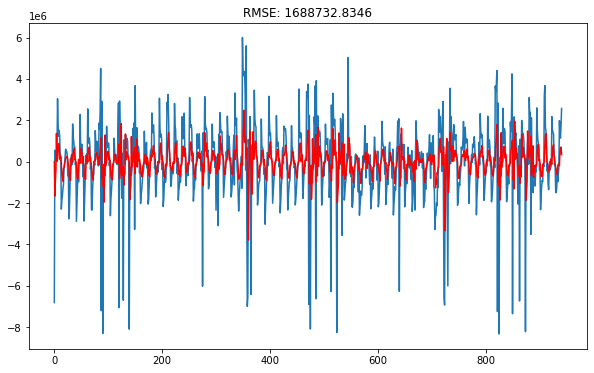

In [321]:

#AR | ARIMA Model
model_3 = ARIMA(residual, order=(4,0,0))
results_3 = model_3.fit()
plt.plot(residual)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual)**2)))
print('plotting AR Model')

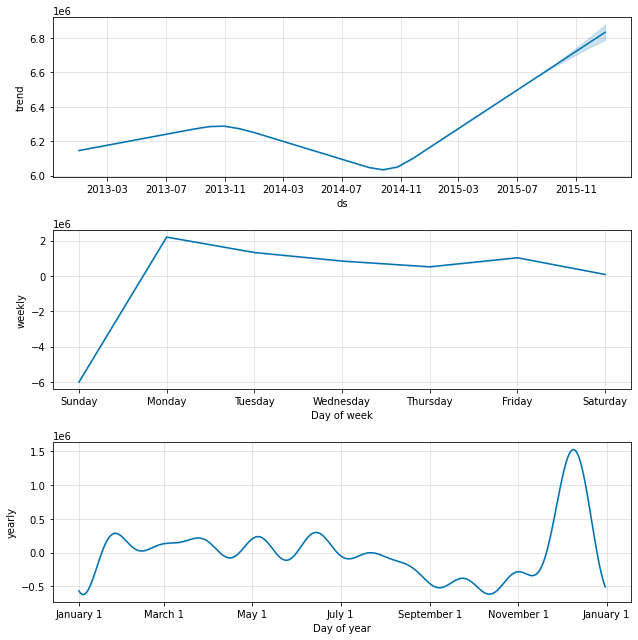

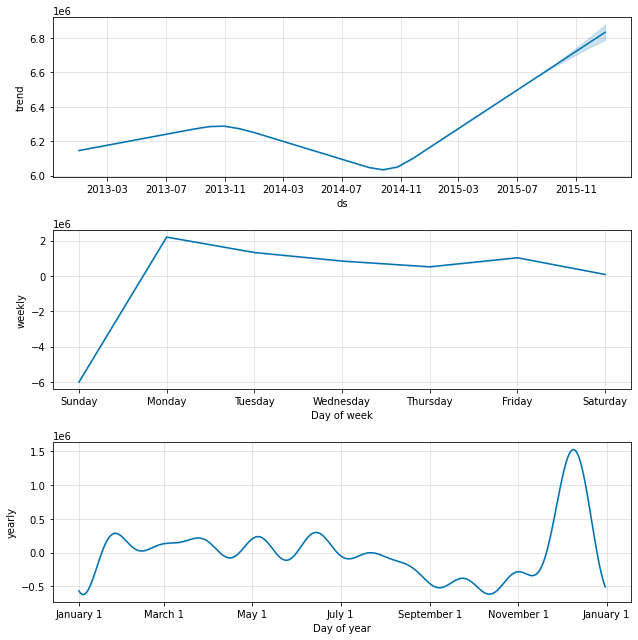

In [322]:
#prediction_x.head()
model_x.plot_components(prediction_x)

## Adding Holidays to Primary Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


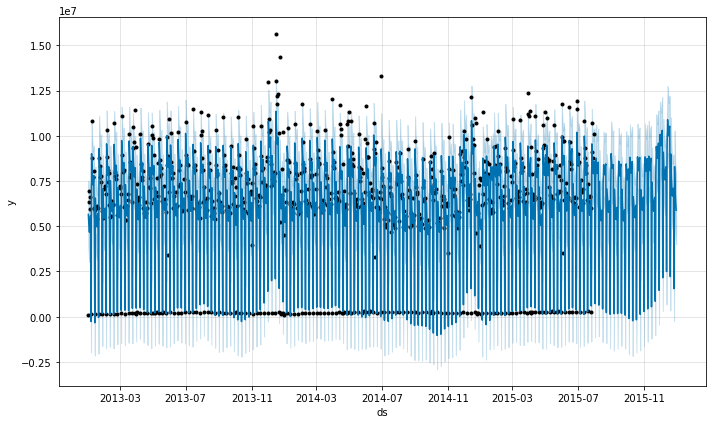

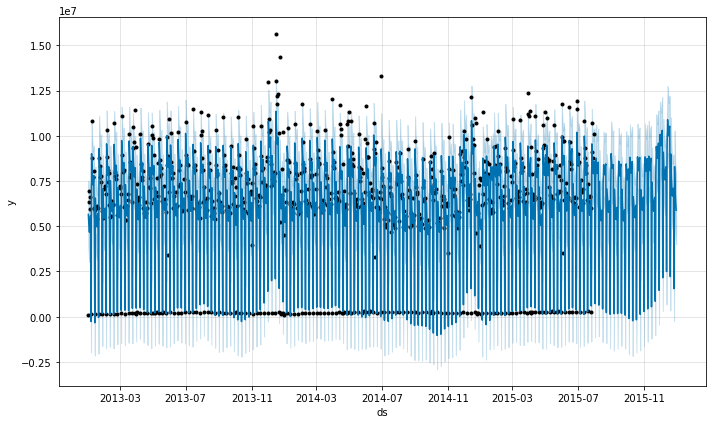

In [323]:
# Initializing Model
model_y = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 30)
#model_y.add_country_holidays(country_name='DE')
model_y.fit(sales)
future_dates_y = model_y.make_future_dataframe(periods = 153)
prediction_y = model_y.predict(future_dates_y)

model_y.plot(prediction_y)

### Residuals

In [324]:
sales_train_pred = prediction_y['yhat'][0:942]
residual = sales['y'] - sales_train_pred

residual_indexed = sales.copy()
residual_indexed['y'] = residual.to_list()
residual_indexed

residual_indexed_S = residual_indexed.set_index('ds')


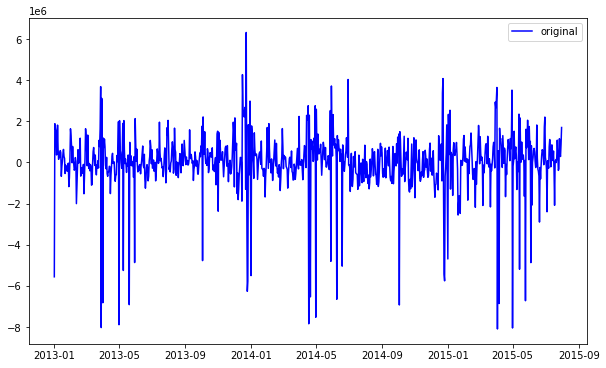

In [325]:
resid = plt.plot(residual_indexed_S, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

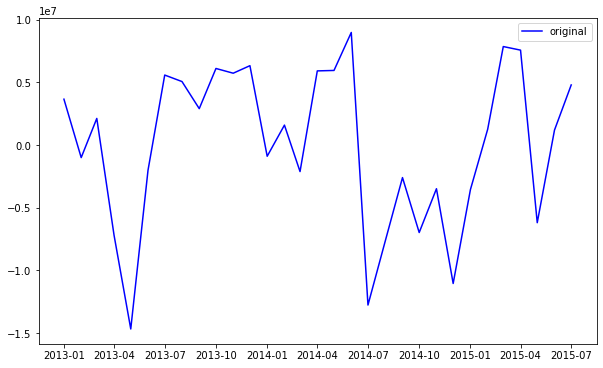

In [326]:
residual_m = residual_indexed.reset_index(drop=True)

residual_m['ds'] = residual_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
residual_m['ds'] = pd.to_datetime(residual_m['ds'])
residual_m = residual_m.groupby('ds').sum()
resid = plt.plot(residual_m, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

In [327]:
###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

#residual_indexed_S.to_csv("../data/residual.csv")
#residual_m.to_csv("../data/residual_m.csv")


###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

plotting AR Model


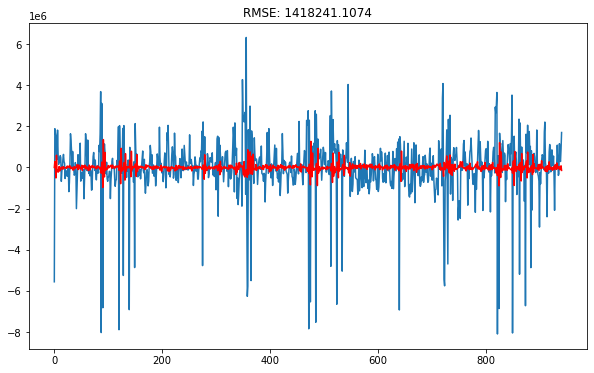

In [328]:

#AR | ARIMA Model
model_3 = ARIMA(residual, order=(4,0,0))
results_3 = model_3.fit()
plt.plot(residual)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual)**2)))
print('plotting AR Model')

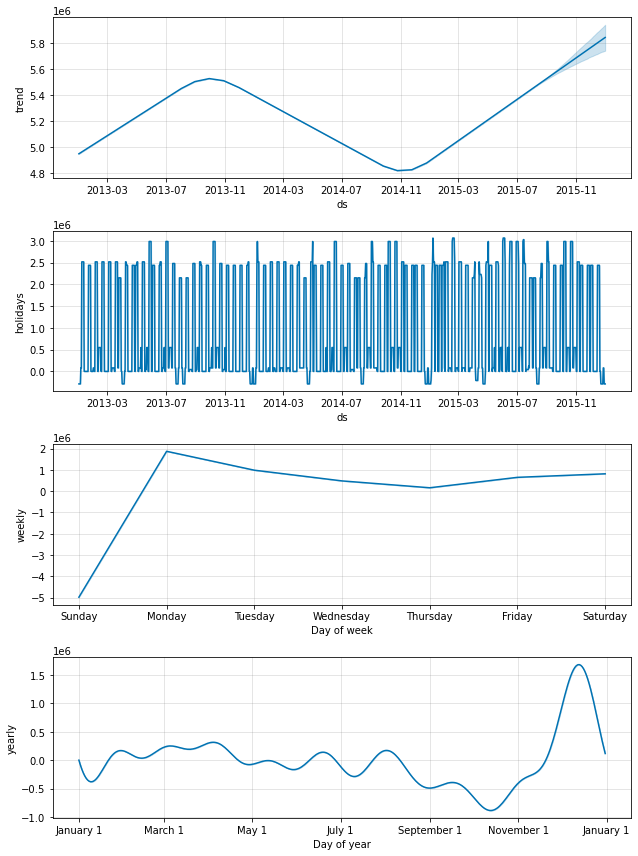

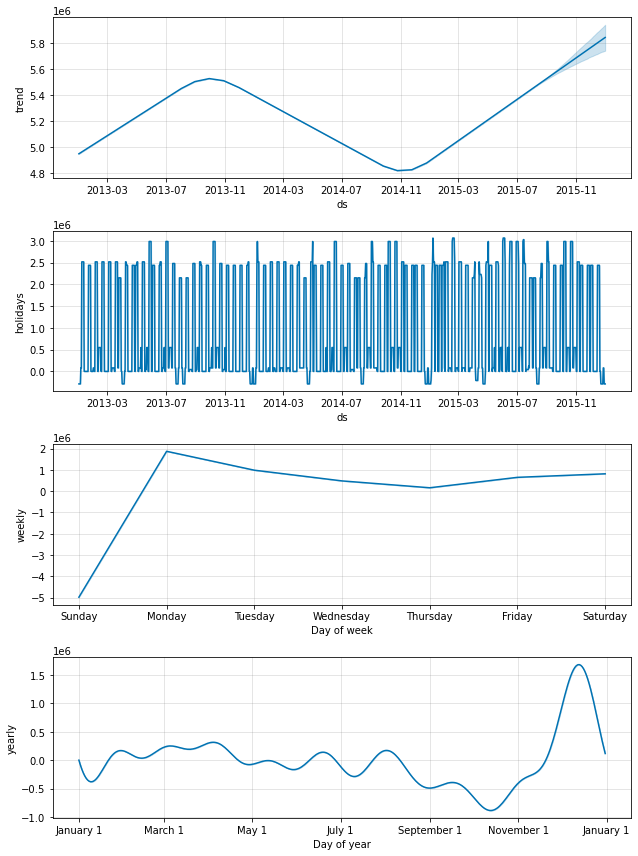

In [329]:
#prediction_y.head()
model_y.plot_components(prediction_y)

## Adding fb built-in Holidays to the Second Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


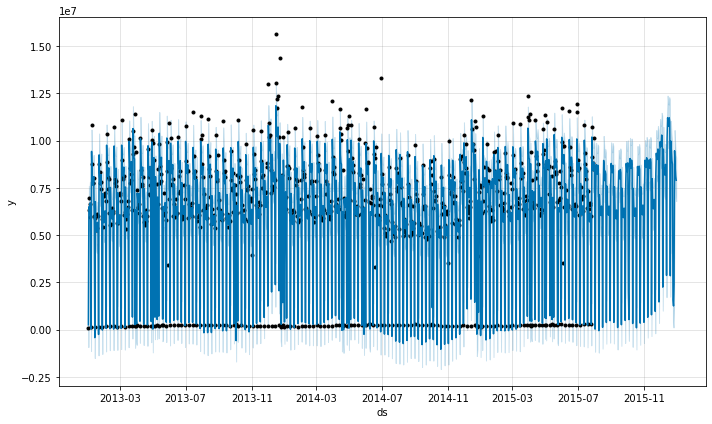

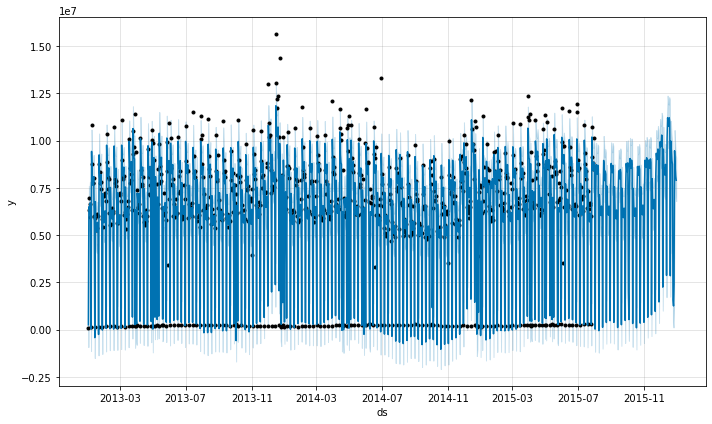

In [330]:
# Initializing Model
model_1 = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 30)
model_1.add_country_holidays(country_name='DE')
model_1.fit(sales)
future_dates_1 = model_1.make_future_dataframe(periods = 153)
prediction_1 = model_1.predict(future_dates_1)

model_1.plot(prediction_1)

### Residuals

In [331]:
sales_train_pred = prediction_1['yhat'][0:942]
residual = sales['y'] - sales_train_pred

residual_indexed = sales.copy()
residual_indexed['y'] = residual.to_list()
residual_indexed

residual_indexed_S = residual_indexed.set_index('ds')


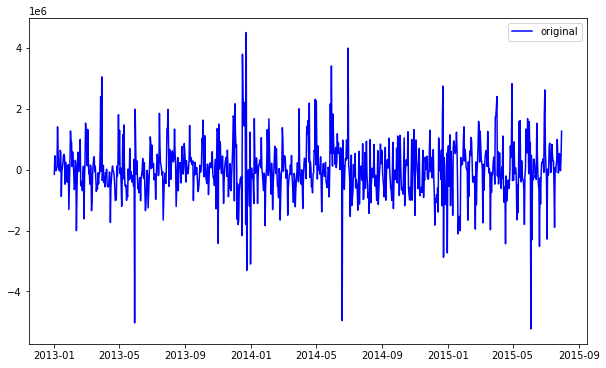

In [332]:
resid = plt.plot(residual_indexed_S, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

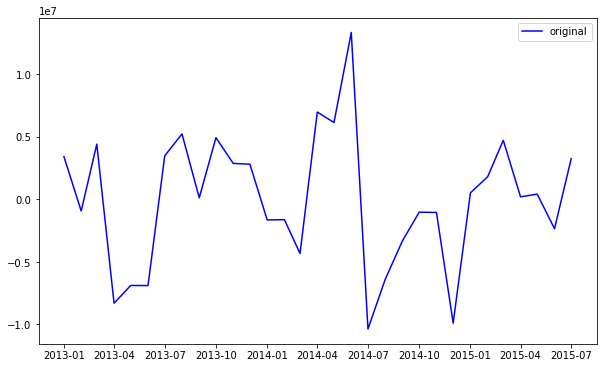

In [333]:
residual_m = residual_indexed.reset_index(drop=True)

residual_m['ds'] = residual_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
residual_m['ds'] = pd.to_datetime(residual_m['ds'])
residual_m = residual_m.groupby('ds').sum()
resid = plt.plot(residual_m, color='blue', label='original')
#Sales_plot = plt.plot(prediction_1_S_1, color='black', label='Predicted-1')
plt.legend(loc="best")
plt.show(block = False)

In [334]:
###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

#residual_indexed_S.to_csv("../data/residual.csv")
#residual_m.to_csv("../data/residual_m.csv")


###CSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSVCSV###

plotting AR Model


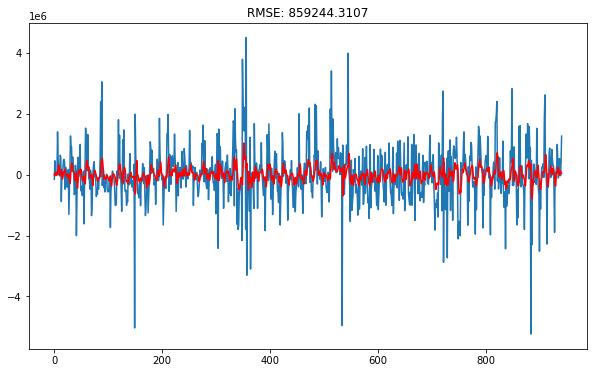

In [335]:

#AR | ARIMA Model
model_3 = ARIMA(residual, order=(4,0,0))
results_3 = model_3.fit()
plt.plot(residual)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual)**2)))
print('plotting AR Model')

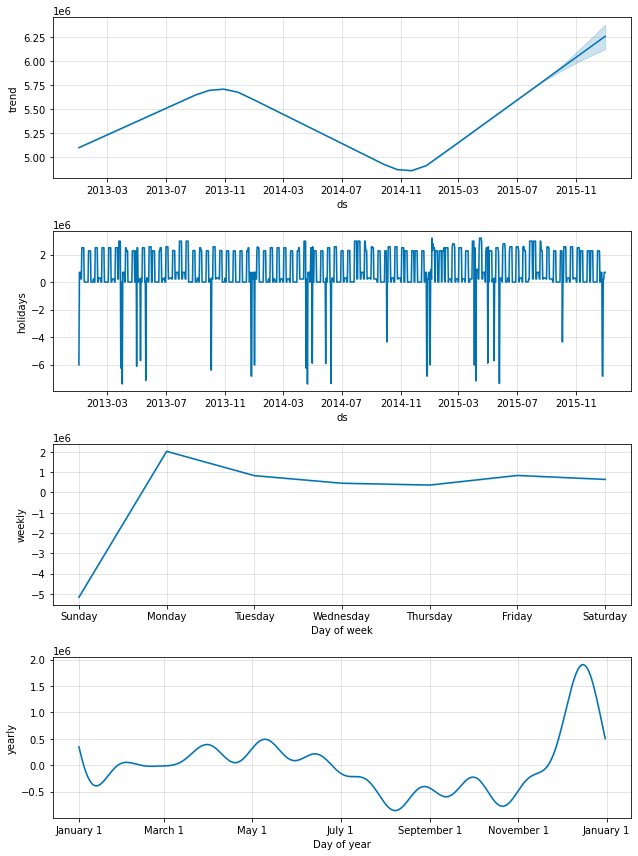

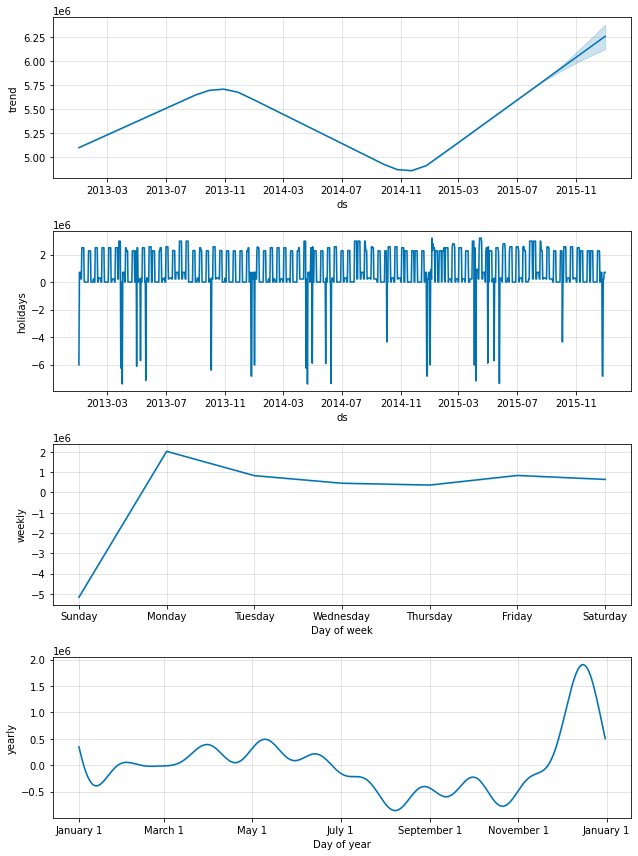

In [336]:
#prediction_1.head()
model_1.plot_components(prediction_1)

# Pre Renovartion

In [337]:
## Creating sales timeSeries

sales_S = sales.set_index('ds')
sales_S

sales_m = Series_day_to_mon(sales_S)

sales_R = sales.set_index('ds')
sales_R = sales_R.loc['2014-07-01':'2014-12-31']

## Assigning holidays_prior_scale

In [381]:
model_a = Prophet(yearly_seasonality=True, holidays=holidays, holidays_prior_scale = 0.1)
model_a.add_country_holidays(country_name='DE')
model_a.fit(Pre_R)
future_dates_a = model_a.make_future_dataframe(periods = 184)
prediction_a = model_a.predict(future_dates_a)

model_b = Prophet(yearly_seasonality=True, holidays=holidays, holidays_prior_scale = 0.01)
model_b.add_country_holidays(country_name='DE')
model_b.fit(Pre_R)
future_dates_b = model_b.make_future_dataframe(periods = 184)
prediction_b = model_b.predict(future_dates_b)

model_c = Prophet(yearly_seasonality=True, holidays=holidays, holidays_prior_scale = 0.001)
model_c.add_country_holidays(country_name='DE')
model_c.fit(Pre_R)
future_dates_c = model_c.make_future_dataframe(periods = 184)
prediction_c = model_c.predict(future_dates_c)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


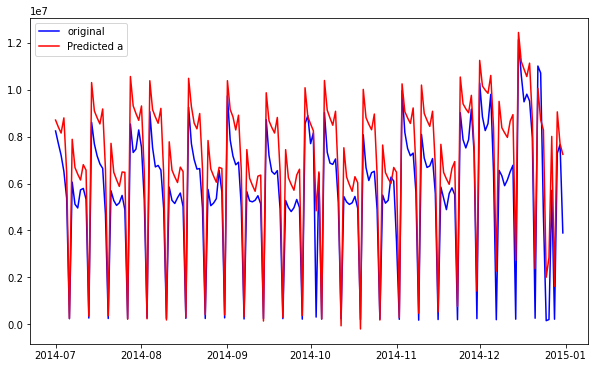

In [382]:
prediction_a_S = pd.concat([prediction_a['ds'], prediction_a['yhat']], axis=1).reset_index(drop=True)
prediction_a_S['ds'] = pd.to_datetime(prediction_a_S['ds'])
prediction_a_S.set_index('ds', inplace=True)
prediction_a_S = prediction_a_S.loc['2014-07-01':]


orig_plot = plt.plot(sales_R, color='blue', label='original')
Pre_R_plot = plt.plot(prediction_a_S, color='red', label='Predicted a')
plt.legend(loc="best")
plt.show(block = False)

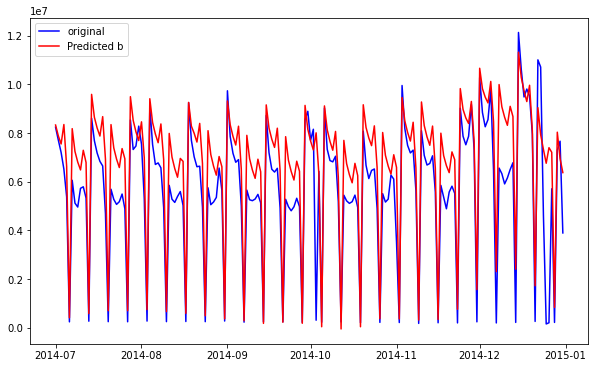

In [383]:
prediction_b_S = pd.concat([prediction_b['ds'], prediction_b['yhat']], axis=1).reset_index(drop=True)
prediction_b_S['ds'] = pd.to_datetime(prediction_b_S['ds'])
prediction_b_S.set_index('ds', inplace=True)
prediction_b_S = prediction_b_S.loc['2014-07-01':]

orig_plot = plt.plot(sales_R, color='blue', label='original')
Pre_R_plot = plt.plot(prediction_b_S, color='red', label='Predicted b')
plt.legend(loc="best")
plt.show(block = False)


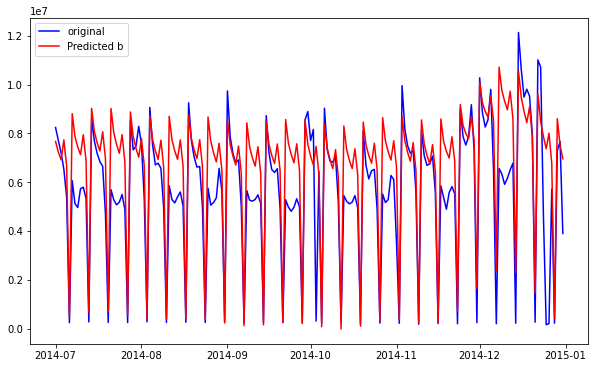

In [384]:
prediction_c_S = pd.concat([prediction_c['ds'], prediction_c['yhat']], axis=1).reset_index(drop=True)
prediction_c_S['ds'] = pd.to_datetime(prediction_c_S['ds'])
prediction_c_S.set_index('ds', inplace=True)
prediction_c_S = prediction_c_S.loc['2014-07-01':]

orig_plot = plt.plot(sales_R, color='blue', label='original')
Pre_R_plot = plt.plot(prediction_c_S, color='red', label='Predicted b')
plt.legend(loc="best")
plt.show(block = False)

# Final Outcome

## Model

In [385]:
train_ = sales_S[:"2014-12-31"]
test_ = sales_S["2015-01-01":]

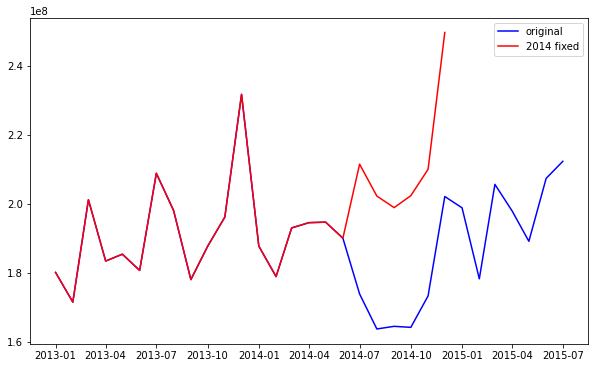

In [386]:
## Fixing Train set with predictions from PRE-Renovation model

train_fixed = train_.copy()
train_fixed["2014-07-01":"2014-12-31"] = Zero_maker(prediction_a_S["2014-07-01":"2014-12-31"]) ## From Pre_R
train_fixed["2014-07-01":"2014-12-31"]

orig_plot = plt.plot(Series_day_to_mon(sales_S), color='blue', label='original')
fixed_plot = plt.plot(Series_day_to_mon(train_fixed), color='red', label='2014 fixed')
plt.legend(loc="best")
plt.show(block = False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


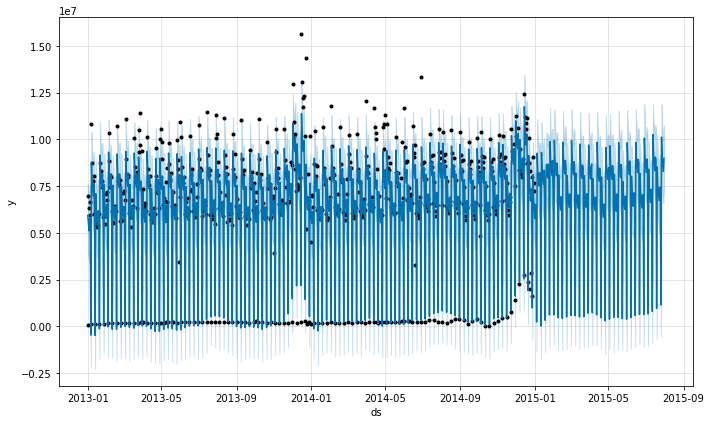

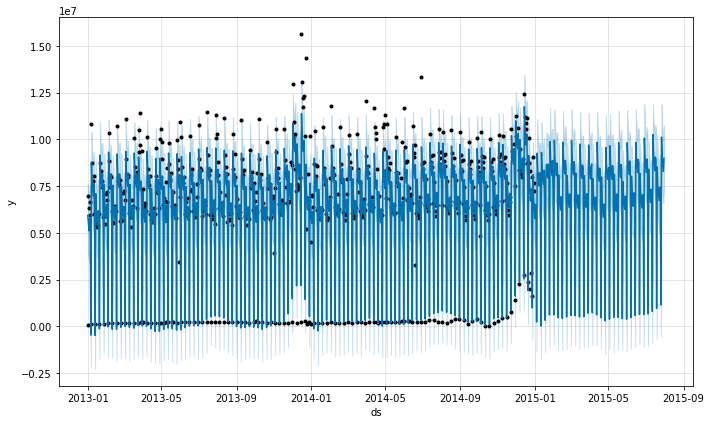

In [387]:
model_5 = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 0.01)
model_5.add_country_holidays(country_name='DE')
model_5.fit(train_fixed.reset_index())
future_dates_5 = model_5.make_future_dataframe(periods = len(test_))
prediction_5 = model_5.predict(future_dates_5)
model_5.plot(prediction_5)

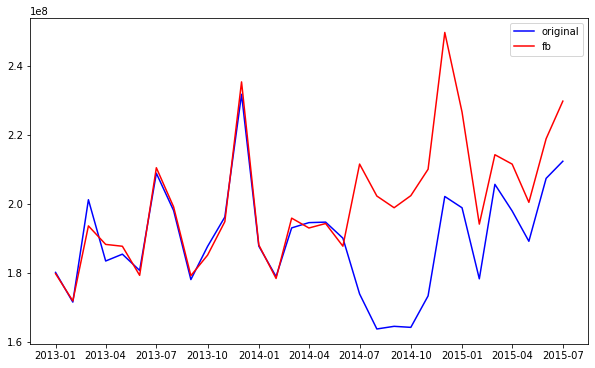

In [388]:
orig_plot = plt.plot(Series_day_to_mon(sales_S), color='blue', label='original')
fb_plot = plt.plot(Series_day_to_mon(y_prediction_indexed), color='red', label='fb')
plt.legend(loc="best")
plt.show(block = False)

## Replacing Test pred with real values

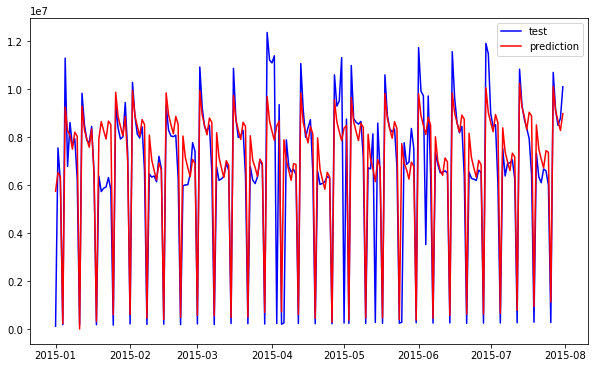

In [389]:
y_prediction = sales.copy()
y_prediction['y'] = prediction_5['yhat']
y_prediction_indexed = y_prediction.set_index('ds')


orig_plot = plt.plot(test_, color='blue', label='test')
final_plot = plt.plot(y_prediction_indexed["2015-01-01":], color='red', label='prediction')
plt.legend(loc="best")
plt.show(block = False)

In [390]:
## Concatinating train_fixed with test: to forecast 2015
final_train = pd.concat((train_fixed, test_))

## Final Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


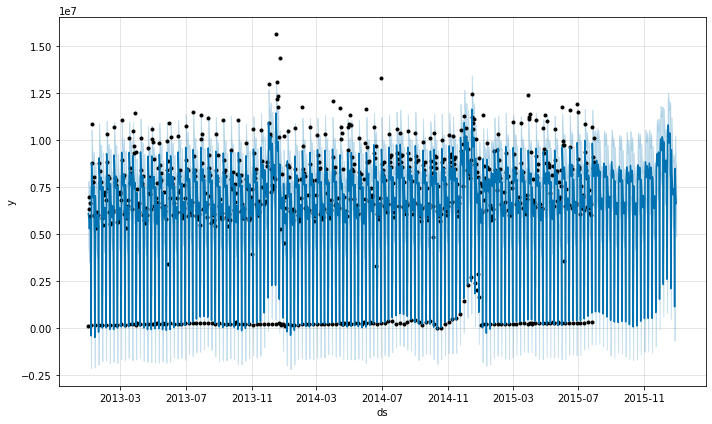

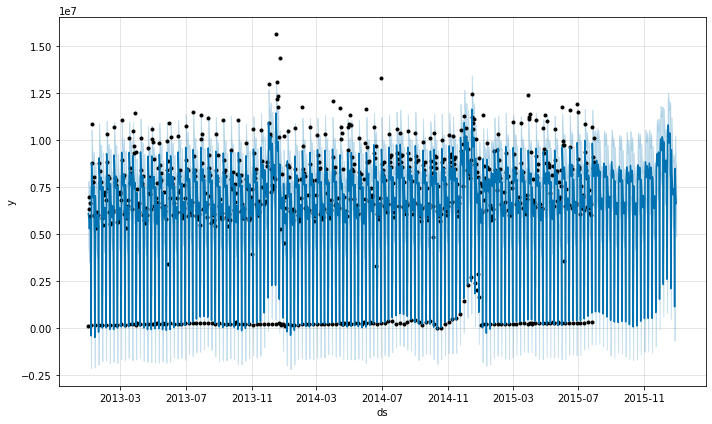

In [391]:
model_6 = Prophet(yearly_seasonality=True, holidays=holidays_pred, holidays_prior_scale = 0.01)
model_6.add_country_holidays(country_name='DE')
model_6.fit(final_train.reset_index())
future_dates_6 = model_6.make_future_dataframe(periods = 152)
prediction_6 = model_6.predict(future_dates_6)
model_6.plot(prediction_6)

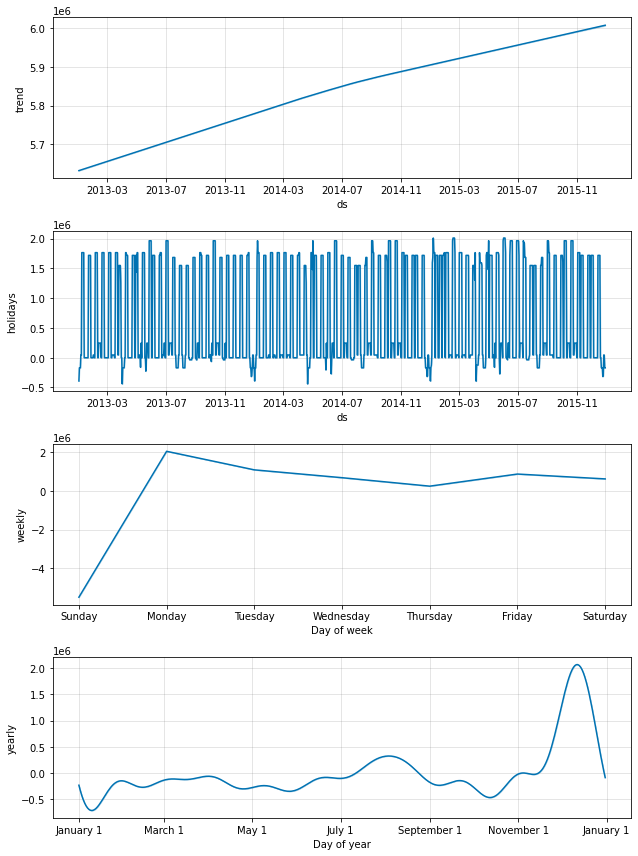

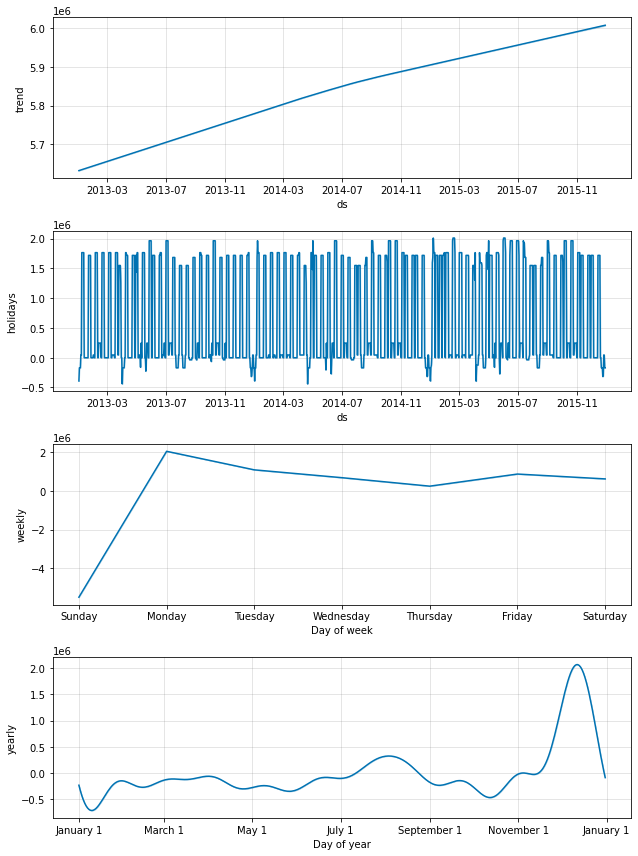

In [392]:
prediction_6.head()
model_6.plot_components(prediction_6)

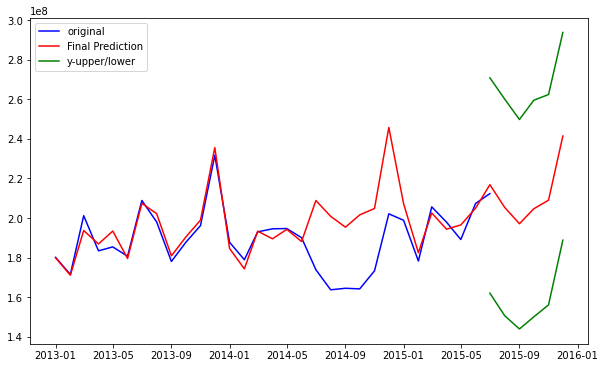

In [394]:
final_prediction = prediction_6.copy()
final_prediction.drop(columns=['trend', 'trend_lower', 'trend_upper', '1000', '1000_lower', '1000_upper', '250', '250_lower', '250_upper',
                               '500', '500_lower', '500_upper', '750', '750_lower', '750_upper',
                               'Christi Himmelfahrt', 'Christi Himmelfahrt_lower',
                               'Christi Himmelfahrt_upper', 'Erster Mai', 'Erster Mai_lower',
                               'Erster Mai_upper', 'Erster Weihnachtstag',
                               'Erster Weihnachtstag_lower', 'Erster Weihnachtstag_upper',
                               'Karfreitag', 'Karfreitag_lower', 'Karfreitag_upper', 'Neujahr',
                               'Neujahr_lower', 'Neujahr_upper', 'Ostermontag', 'Ostermontag_lower',
                               'Ostermontag_upper', 'Pfingstmontag', 'Pfingstmontag_lower',
                               'Pfingstmontag_upper', 'Tag der Deutschen Einheit',
                               'Tag der Deutschen Einheit_lower', 'Tag der Deutschen Einheit_upper',
                               'Zweiter Weihnachtstag', 'Zweiter Weihnachtstag_lower',
                               'Zweiter Weihnachtstag_upper', 'additive_terms', 'additive_terms_lower',
                               'additive_terms_upper', 'holidays', 'holidays_lower', 'holidays_upper',
                               'promo', 'promo_lower', 'promo_upper', 'weekly', 'weekly_lower',
                               'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
                               'multiplicative_terms', 'multiplicative_terms_lower',
                               'multiplicative_terms_upper'], inplace=True)
final_prediction_indexed = final_prediction.set_index('ds')

orig_plot = plt.plot(Series_day_to_mon(sales_S), color='blue', label='original')
train_plot = plt.plot(Series_day_to_mon(final_prediction_indexed['yhat']), color='red', label='Final Prediction')
train_upper_plot = plt.plot(Series_day_to_mon(final_prediction_indexed['yhat_upper']['2015-07-01':]), color='green', label='y-upper/lower')
train_loer_plot = plt.plot(Series_day_to_mon(final_prediction_indexed['yhat_lower']['2015-07-01':]), color='green')



plt.legend(loc="best")
plt.show(block = False)